<a href="https://colab.research.google.com/github/g8428/TIL/blob/master/220303_nlp_deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))

train_images = train_images/255.
test_images = test_images/255.

valid_images, test_images, valid_labels, test_labels = train_test_split(test_images, test_labels, test_size=0.15, shuffle=True)

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Dropout

inputs = Input(shape=(28, 28, 1))
conv1 = Conv2D(32, (3, 3), activation=tf.nn.relu)(inputs)
pool1 = MaxPool2D((2, 2))(conv1)

conv2 = Conv2D(64, (3, 3), activation=tf.nn.relu)(pool1)
pool2 = MaxPool2D((2, 2))(conv2)

conv3 = Conv2D(64, (3, 3), activation=tf.nn.relu)(pool2)
flat = Flatten()(conv3)

dense4 = Dense(64, activation='relu') (flat)
drop4 = Dropout(rate=0.2)(dense4) # 일반화, 드랍아웃, 덴스레이어에서 20%비율로 스킵
outputs = Dense(10, activation='softmax')(drop4)

model = Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928 

In [4]:
# 오버핏 되지 않는 지점 모델값 세이브
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

MODEL_SAVE_FOLDER = '/content/drive/MyDrive/2022-1/국비지원교육/실습폴더/models/'
model_path = f"{MODEL_SAVE_FOLDER}mnist-{{epoch:d}}-{{val_loss:.5f}}-{{val_accuracy:.5f}}.hdf5"

cb_checkpoint = ModelCheckpoint(filepath=model_path, 
                                monitor='val_accuracy', 
                                verbose=1,
                                save_best_only=True) # 성능향상 됐을 때만 저장

cb_early_stopping = EarlyStopping(monitor='val_accuracy', patience=6)
# 일정기간동안 하락하면 stop, 기간안에 다시 상승하면 reset


In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_images, train_labels, validation_data=(valid_images, valid_labels),
                 epochs=100, batch_size=200,
                 callbacks=[cb_checkpoint, cb_early_stopping])
#validation_data = valid 데이터도 같이 계산

Epoch 1/100
299/300 [============================>.] - ETA: 0s - loss: 0.3413 - accuracy: 0.8945
Epoch 1: val_accuracy improved from -inf to 0.98118, saving model to /content/drive/MyDrive/2022-1/국비지원교육/실습폴더/models/mnist-1-0.06375-0.98118.hdf5
300/300 [==============================] - 6s 18ms/step - loss: 0.3405 - accuracy: 0.8948 - val_loss: 0.0638 - val_accuracy: 0.9812
Epoch 2/100
297/300 [============================>.] - ETA: 0s - loss: 0.0805 - accuracy: 0.9759
Epoch 2: val_accuracy improved from 0.98118 to 0.98659, saving model to /content/drive/MyDrive/2022-1/국비지원교육/실습폴더/models/mnist-2-0.04297-0.98659.hdf5
300/300 [==============================] - 4s 15ms/step - loss: 0.0805 - accuracy: 0.9759 - val_loss: 0.0430 - val_accuracy: 0.9866
Epoch 3/100
299/300 [============================>.] - ETA: 0s - loss: 0.0583 - accuracy: 0.9824
Epoch 3: val_accuracy improved from 0.98659 to 0.98882, saving model to /content/drive/MyDrive/2022-1/국비지원교유

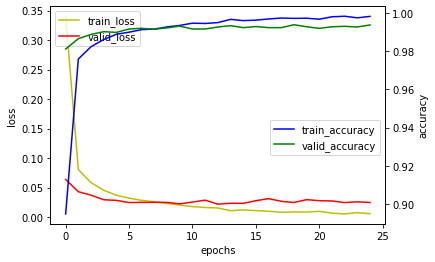

In [8]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='valid_loss')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(hist.history['accuracy'], 'b', label='train_accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='valid_accuracy')
acc_ax.set_xlabel('epochs')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper right', bbox_to_anchor=(1, 0.5))

plt.show()


In [9]:
saved_path = '/content/drive/MyDrive/2022-1/국비지원교육/실습폴더/models/mnist-1-0.06375-0.98118.hdf5'

loaded_model = tf.keras.models.load_model(saved_path)

print(f"Loss, Accuracy {loaded_model.evaluate(test_images, test_labels)}")

47/47 [==============================] - 0s 5ms/step - loss: 0.0720 - accuracy: 0.9760
Loss, Accuracy [0.0719667598605156, 0.9760000109672546]


In [10]:
!ls -la '/content/drive/MyDrive/2022-1/국비지원교육/실습폴더/models/'

total 11475
-rw------- 1 root root 1174704 Mar  3 04:08 mnist-10-0.02233-0.99318.hdf5
-rw------- 1 root root 1174704 Mar  3 04:07 mnist-1-0.06375-0.98118.hdf5
-rw------- 1 root root 1174704 Mar  3 04:08 mnist-14-0.02336-0.99341.hdf5
-rw------- 1 root root 1174704 Mar  3 04:09 mnist-19-0.02462-0.99388.hdf5
-rw------- 1 root root 1174704 Mar  3 04:07 mnist-2-0.04297-0.98659.hdf5
-rw------- 1 root root 1174704 Mar  3 04:07 mnist-3-0.03709-0.98882.hdf5
-rw------- 1 root root 1174704 Mar  3 04:08 mnist-4-0.02931-0.99024.hdf5
-rw------- 1 root root 1174704 Mar  3 04:08 mnist-6-0.02457-0.99165.hdf5
-rw------- 1 root root 1174704 Mar  3 04:08 mnist-7-0.02493-0.99200.hdf5
-rw------- 1 root root 1174704 Mar  3 04:08 mnist-9-0.02479-0.99224.hdf5


In [16]:
!rm '/content/drive/MyDrive/2022-1/국비지원교육/실습폴더/models/*'

rm: cannot remove '/content/drive/MyDrive/2022-1/국비지원교육/실습폴더/models/*': No such file or directory


In [12]:
!cd '/content/drive/MyDrive/2022-1/국비지원교육/실습폴더/models'

In [14]:
!rm '/content/drive/MyDrive/2022-1/국비지원교육/실습폴더/models/'

rm: cannot remove '/content/drive/MyDrive/2022-1/국비지원교육/실습폴더/models/': Is a directory


Mounted at /content/drive


In [22]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Dropout

# 클래스로 만들어서 사용하기
class MNISTModel(Model):
    def __init__(self):
        super(MNISTModel, self).__init__()
        self.conv1 = Conv2D(32, (3, 3), activation='relu')
        self.pool1 = MaxPool2D()
        self.conv2 = Conv2D(64, (3, 3), activation='relu')
        self.pool2 = MaxPool2D()
        self.conv3 = Conv2D(64, (3, 3), activation='relu')
        self.flat = Flatten()
        self.dense4 = Dense(64, activation='relu')
        self.drop = Dropout(0.2)
        self.outputs = Dense(10, activation='softmax')

    #Forward 
    def call(self, inputs, training=False):
        net = self.conv1(inputs)
        net = self.pool1(net)
        net = self.conv2(net)
        net = self.pool2(net)
        net = self.conv3(net)
        net = self.flat(net)
        net = self.dense4(net)
        net = self.drop(net)
        net = self.outputs(net)

        return net

model = MNISTModel()
inputs = Input(shape=(28, 28, 1))
model(inputs)

model.summary()

Model: "mnist_model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           multiple                  320       
                                                                 
 max_pooling2d_6 (MaxPooling  multiple                 0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          multiple                  18496     
                                                                 
 max_pooling2d_7 (MaxPooling  multiple                 0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          multiple                  36928     
                                                                 
 flatten_3 (Flatten)         multiple                

In [20]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

MODEL_SAVE_FOLDER = '/content/drive/MyDrive/2022-1/국비지원교육/실습폴더/models/'
model_path = f"{MODEL_SAVE_FOLDER}mnist-{{epoch:d}}-{{val_loss:.5f}}-{{val_accuracy:.5f}}.hdf5"

cb_checkpoint = ModelCheckpoint(filepath=model_path, 
                                monitor='val_accuracy', 
                                verbose=1,
                                save_weights_only=True,
                                save_best_only=True)
                                # class는 학습시키지 못함, best값만 저장

cb_early_stopping = EarlyStopping(monitor='val_accuracy', patience=6)


In [21]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_images, train_labels, validation_data=(valid_images, valid_labels),
                 epochs=100, batch_size=200,
                 callbacks=[cb_checkpoint, cb_early_stopping])

Epoch 1/100
297/300 [============================>.] - ETA: 0s - loss: 0.3849 - accuracy: 0.8807
Epoch 1: val_accuracy improved from -inf to 0.97471, saving model to /content/drive/MyDrive/2022-1/국비지원교육/실습폴더/models/mnist-1-0.08300-0.97471.hdf5
300/300 [==============================] - 5s 15ms/step - loss: 0.3820 - accuracy: 0.8815 - val_loss: 0.0830 - val_accuracy: 0.9747
Epoch 2/100
299/300 [============================>.] - ETA: 0s - loss: 0.0945 - accuracy: 0.9714
Epoch 2: val_accuracy improved from 0.97471 to 0.98529, saving model to /content/drive/MyDrive/2022-1/국비지원교육/실습폴더/models/mnist-2-0.05048-0.98529.hdf5
300/300 [==============================] - 4s 14ms/step - loss: 0.0944 - accuracy: 0.9714 - val_loss: 0.0505 - val_accuracy: 0.9853
Epoch 3/100
299/300 [============================>.] - ETA: 0s - loss: 0.0658 - accuracy: 0.9804
Epoch 3: val_accuracy improved from 0.98529 to 0.98871, saving model to /content/drive/MyDrive/2022-1/국비지원교유

In [23]:
saved_path = '/content/drive/MyDrive/2022-1/국비지원교육/실습폴더/models/mnist-6-0.02689-0.99200.hdf5'
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.load_weights(saved_path)

print(f"Loss, Accuracy {model.evaluate(test_images, test_labels)}")

47/47 [==============================] - 1s 8ms/step - loss: 0.0353 - accuracy: 0.9873
Loss, Accuracy [0.03531945124268532, 0.987333357334137]


In [24]:
output = model(test_images)
output.shape

TensorShape([1500, 10])

In [26]:
import numpy as np
np.argmax(output[0])

6

In [28]:
test_labels[0]

6